In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import requests
import json

In [2]:
#file path
#Import clean csv file
project_df_path = "Data/merge.csv"
project_df = pd.read_csv(project_df_path)
project_df.head()

,Year_HS,Overall rank_HS,Country or region_HS,Score_HS,GDP per capita_HS,Social support_HS,Healthy life expectancy_HS,Freedom to make life choices_HS,Generosity_HS,Perceptions of corruption_HS,...,Satisfied demand for contraception (% of women)_SP,Equality of political power by socioeconomic position (0=unequal power; 4=equal power)_SP,Equality of political power by social group (0=unequal power; 4=equal power)_SP,Equality of political power by gender (0=unequal power; 4=equal power)_SP,Discrimination and violence against minorities (0=low; 10=high)_SP,Acceptance of gays and lesbians (0=low; 100=high)_SP,Quality weighted universities (points)_SP,Citable documents_SP,Women with advanced education (%)_SP,Years of tertiary schooling_SP
0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,...,90.3,3.195,3.428,2.764,1.2,0.79,42.4,3.5186,0.8919,4.2892
1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,...,87.6,3.544,3.750,3.318,4.3,0.88,29.8,4.5731,0.9135,4.1745
2,2019,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,...,88.5,3.384,3.396,3.363,3.3,0.90,31.4,4.1070,0.9434,4.0184
3,2019,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,...,88.5,3.113,2.772,2.746,4.2,0.90,62.2,3.2448,0.9065,4.1465
4,2019,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,...,88.7,2.958,3.449,2.866,3.3,0.79,49.0,5.1351,0.9103,2.8077


In [3]:
#see dataframe column as a list
#project_df.columns.tolist()

In [4]:
#suppress warning
import warnings
warnings.simplefilter("ignore")

In [5]:
#Get ranking and totals data
totals_df = project_df[['Year_HS', 'Country_SP', 'Overall rank_HS', 'Score_HS', 'SPI Rank_SP',  'Social Progress Index_SP']]

#Rename year and country columns
totals_df.rename(columns = {"Year_HS":"Year", "Country_SP":"Country"}, inplace = True)

#configure SPI ranking to not have a decimal
totals_df["SPI Rank_SP"] = totals_df["SPI Rank_SP"].astype(int)

In [6]:
#Top Rankings of Happiness Score
#ranking_HS = totals_df.sort_values(["Year","Overall rank_HS"])
#ranking_HS

In [7]:
#Top Rankings of Social Progress Index
#ranking_SP = totals_df.sort_values(["Year","SPI Rank_SP"])
#ranking_SP

In [8]:
ranking_both_top10 = totals_df[(totals_df["Overall rank_HS"] <= 10) & (totals_df["SPI Rank_SP"] <= 10)]
ranking_both_top10

,Year,Country,Overall rank_HS,Score_HS,SPI Rank_SP,Social Progress Index_SP
0,2019,Finland,1,7.769,4,91.94
1,2019,Denmark,2,7.600,2,92.08
2,2019,Norway,3,7.554,1,93.08
3,2019,Netherlands,5,7.488,10,91.16
4,2019,Switzerland,6,7.480,6,91.52
5,2019,Sweden,7,7.343,7,91.32
6,2019,New Zealand,8,7.307,5,91.62
7,2019,Canada,9,7.278,8,91.26
76,2018,Finland,1,7.632,4,91.82
77,2018,Norway,2,7.594,1,92.87


In [9]:
ranking_both_top25 = totals_df[(totals_df["Overall rank_HS"] <= 25) & (totals_df["SPI Rank_SP"] <= 25)]
ranking_both_top25

,Year,Country,Overall rank_HS,Score_HS,SPI Rank_SP,Social Progress Index_SP
0,2019,Finland,1,7.769,4,91.94
1,2019,Denmark,2,7.600,2,92.08
2,2019,Norway,3,7.554,1,93.08
3,2019,Netherlands,5,7.488,10,91.16
4,2019,Switzerland,6,7.480,6,91.52
...,...,...,...,...,...,...
308,2015,Austria,13,7.200,15,88.85
310,2015,United States,15,7.119,22,86.58
312,2015,Ireland,18,6.940,13,89.15
313,2015,Belgium,19,6.937,12,89.39


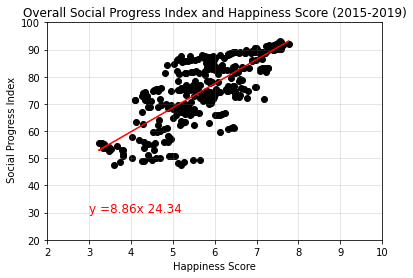

R squared: 0.5932533292668125


In [10]:
#Scatterplot all years 
x_values = totals_df["Score_HS"]
y_values = totals_df["Social Progress Index_SP"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y =" + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title("Overall Social Progress Index and Happiness Score (2015-2019)")
plt.ylabel(" Social Progress Index")
plt.xlabel("Happiness Score")
plt.ylim(20,100)
plt.xlim(2,10)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)
plt.annotate(line_eq, (3,30), fontsize=12, color="red")

plt.scatter(x_values, y_values, color="black", marker="o")
plt.plot(x_values, regress_values, "r-")
plt.show()

#print r squared
print(f"R squared: {rvalue**2}")

In [11]:
#Group by country
grouped_totals_df = totals_df.groupby(["Country"])
grouped_totals_df.mean()

,Year,Overall rank_HS,Score_HS,SPI Rank_SP,Social Progress Index_SP
Country,,,,,
Albania,2017.0,106.400000,4.712600,51.800000,75.192000
Argentina,2017.0,31.200000,6.459400,42.000000,79.426000
Armenia,2017.0,122.800000,4.393200,59.200000,73.300000
Australia,2018.0,10.333333,7.261333,8.333333,91.133333
Austria,2017.0,12.000000,7.142000,15.400000,89.072000
...,...,...,...,...,...
Turkey,2017.0,75.200000,5.415400,85.000000,68.120000
Ukraine,2017.0,127.400000,4.307200,66.400000,71.730000
United Kingdom,2017.0,17.800000,6.910000,18.200000,88.770000


In [12]:
#Converting groupby to a dataframe
averages_df = pd.DataFrame(grouped_totals_df["Overall rank_HS", "Score_HS", "SPI Rank_SP", "Social Progress Index_SP"].mean())

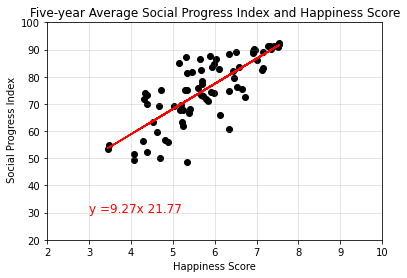

R squared: 0.6199444420732403


In [13]:
#Scatterplot averaged data 
x_values = averages_df["Score_HS"]
y_values = averages_df["Social Progress Index_SP"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y =" + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title("Five-year Average Social Progress Index and Happiness Score")
plt.ylabel(" Social Progress Index")
plt.xlabel("Happiness Score")
plt.ylim(20,100)
plt.xlim(2,10)
plt.grid(True, linestyle="-", which="major", color="gray", alpha=0.25)
plt.annotate(line_eq, (3,30), fontsize=12, color="red")

plt.scatter(x_values, y_values, color="black", marker="o")
plt.plot(x_values, regress_values, "r-")
plt.show()

#print r squared
print(f"R squared: {rvalue**2}")

In [14]:
den_file = "Data/population_density.csv"

# Read our Social Progress data into pandas
density_df = pd.read_csv(den_file, encoding = "ISO-8859-1")
density_df

,Index,Variant,"Region, subregion, country or area *",Country code,Type,Parent code,1950,1951,1952,1953,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Estimates,WORLD,900,World,0,19.496907,19.862821,20.222771,20.582107,...,54.123887,54.774445,55.425929,56.077063,56.726641,57.374057,58.018491,58.658276,59.291488,59.916655
1,18,Estimates,Africa,903,Region,1840,7.683164,7.836080,7.996921,8.165425,...,35.968443,36.910593,37.878674,38.869904,39.881935,40.914087,41.965802,43.034954,44.119096,45.216418
2,19,Estimates,Asia,935,Region,1840,45.271262,46.267296,47.202255,48.106489,...,137.117638,138.576485,140.022331,141.452034,142.862650,144.252535,145.619855,146.961232,148.272866,149.551613
3,20,Estimates,Europe,908,Region,1840,24.817318,25.043009,25.285606,25.538040,...,33.334266,33.396364,33.455849,33.513514,33.569566,33.624222,33.675994,33.721383,33.755870,33.776346
4,21,Estimates,Latin America and the Caribbean,904,Region,1840,8.382603,8.604058,8.834226,9.072215,...,29.692790,30.020742,30.345701,30.666095,30.980784,31.289156,31.591478,31.888586,32.181755,32.471803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,285,Estimates,Bermuda,60,Country/Area,918,745.120000,756.000000,768.740000,782.840000,...,1301.520000,1294.740000,1287.620000,1280.760000,1273.900000,1267.200000,1260.800000,1255.260000,1250.160000,1245.460000
268,286,Estimates,Canada,124,Country/Area,918,1.510242,1.548186,1.588545,1.631373,...,3.798220,3.840325,3.881508,3.921955,3.961800,4.000979,4.039374,4.077035,4.114037,4.150450
269,287,Estimates,Greenland,304,Country/Area,918,0.056019,0.057171,0.058316,0.059605,...,0.137788,0.137598,0.137439,0.137369,0.137357,0.137430,0.137588,0.137812,0.138044,0.138316
270,288,Estimates,Saint Pierre and Miquelon,666,Country/Area,918,19.856522,20.039130,20.208696,20.339130,...,27.491304,27.178261,26.817391,26.404348,26.052174,25.795652,25.586957,25.413043,25.308696,25.195652


In [15]:
country_df = density_df.loc[density_df['Type'] == 'Country/Area']
rename_country = country_df.rename(columns={'Region, subregion, country or area *':'Country'})

In [16]:
clean_country = rename_country[['Country','2015', '2016', '2017', '2018', '2019']]
clean_country['Country'] = clean_country['Country'].replace({'United States of America':'United States'})
clean_country['Country'] = clean_country['Country'].replace({'United Republic of Tanzania':'Tanzania'})
clean_country['Country'] = clean_country['Country'].replace({'Russian Federation':'Russia'})
density_2015 = clean_country[['Country', '2015']]
density_2016 = clean_country[['Country', '2016']]
density_2017 = clean_country[['Country', '2017']]
density_2018 = clean_country[['Country', '2018']]
density_2019 = clean_country[['Country', '2019']]
density_2019['Country']

9                        Burundi
10                       Comoros
11                      Djibouti
12                       Eritrea
13                      Ethiopia
                 ...            
267                      Bermuda
268                       Canada
269                    Greenland
270    Saint Pierre and Miquelon
271                United States
Name: Country, Length: 235, dtype: object

In [17]:
density_2015 = density_2015.rename(columns={'2015':'Population Density'})
density_2016 = density_2016.rename(columns={'2016':'Population Density'})
density_2017 = density_2017.rename(columns={'2017':'Population Density'})
density_2018 = density_2018.rename(columns={'2018':'Population Density'})
density_2019 = density_2019.rename(columns={'2019':'Population Density'})
density_2019.loc[density_2019['Country'] == 'Russia']

,Country,Population Density
222,Russia,8.907212


In [18]:
density_2015['Country & Year'] = ('2015')+density_2015['Country']
density_2016['Country & Year'] = ('2016')+density_2016['Country']
density_2017['Country & Year'] = ('2017')+density_2017['Country']
density_2018['Country & Year'] = ('2018')+density_2018['Country']
density_2019['Country & Year'] = ('2019')+density_2019['Country']
density_2015.loc[(density_2015['Country'] == 'Finland') | 
                 (density_2015['Country'] == 'Denmark') |
                 (density_2015['Country'] == 'Norway')  |
                 (density_2015['Country'] == 'Iceland')]

,Country,Population Density,Country & Year
227,Denmark,134.072472,2015Denmark
230,Finland,18.036553,2015Finland
231,Iceland,3.294135,2015Iceland
236,Norway,14.235649,2015Norway


In [19]:
v1 = density_2015.append(density_2016)

In [20]:
v2 = v1.append(density_2017)

In [21]:
v3 = v2.append(density_2018)

In [22]:
v4 = v3.append(density_2019)

In [23]:
v4

,Country,Population Density,Country & Year
9,Burundi,395.639953,2015Burundi
10,Comoros,417.751209,2015Comoros
11,Djibouti,39.430457,2015Djibouti
12,Eritrea,33.097208,2015Eritrea
13,Ethiopia,100.835453,2015Ethiopia
...,...,...,...
267,Bermuda,1250.160000,2019Bermuda
268,Canada,4.114037,2019Canada
269,Greenland,0.138044,2019Greenland
270,Saint Pierre and Miquelon,25.308696,2019Saint Pierre and Miquelon


In [24]:
new_merge = project_df
new_merge['Country & Year'] = new_merge["Year_HS"].astype(str) + new_merge["Country or region_HS"]

In [25]:
combined_merge = pd.merge(v4, new_merge, on="Country & Year", how='right')
combined_merge

,Country,Population Density,Country & Year,Year_HS,Overall rank_HS,Country or region_HS,Score_HS,GDP per capita_HS,Social support_HS,Healthy life expectancy_HS,...,Satisfied demand for contraception (% of women)_SP,Equality of political power by socioeconomic position (0=unequal power; 4=equal power)_SP,Equality of political power by social group (0=unequal power; 4=equal power)_SP,Equality of political power by gender (0=unequal power; 4=equal power)_SP,Discrimination and violence against minorities (0=low; 10=high)_SP,Acceptance of gays and lesbians (0=low; 100=high)_SP,Quality weighted universities (points)_SP,Citable documents_SP,Women with advanced education (%)_SP,Years of tertiary schooling_SP
0,Mauritius,620.422168,2015Mauritius,2015,71,Mauritius,5.477,1.00761,0.98521,0.70950,...,48.7,2.486,2.578,1.985,3.8,0.330,0.8,0.1673,0.4833,2.0022
1,Rwanda,460.845805,2015Rwanda,2015,154,Rwanda,3.465,0.22208,0.77370,0.42864,...,62.2,1.517,0.613,2.571,8.8,0.065,1.6,0.0226,0.0815,0.4328
2,Tanzania,58.119935,2015Tanzania,2015,146,Tanzania,3.781,0.28520,1.00268,0.38215,...,54.0,2.190,2.633,2.185,5.7,0.050,2.6,0.0253,0.1719,0.1838
3,Cameroon,49.286827,2015Cameroon,2015,133,Cameroon,4.252,0.42250,0.88767,0.23402,...,44.3,1.255,1.178,2.027,8.1,0.050,2.2,0.0491,0.2594,0.7646
4,Lesotho,67.819862,2015Lesotho,2015,97,Lesotho,4.898,0.37545,1.04103,0.07612,...,77.9,2.943,3.168,2.333,4.4,0.192,0.2,0.0166,0.2654,0.6616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,Germany,239.605939,2019Germany,2019,17,Germany,6.985,1.37300,1.45400,0.98700,...,90.9,3.160,3.453,3.160,4.6,0.730,275.0,1.9926,0.9075,3.2649
367,Netherlands,507.032117,2019Netherlands,2019,5,Netherlands,7.488,1.39600,1.52200,0.99900,...,88.5,3.113,2.772,2.746,4.2,0.900,62.2,3.2448,0.9065,4.1465
368,Switzerland,217.414743,2019Switzerland,2019,6,Switzerland,7.480,1.45200,1.52600,1.05200,...,88.7,2.958,3.449,2.866,3.3,0.790,49.0,5.1351,0.9103,2.8077
369,Canada,4.114037,2019Canada,2019,9,Canada,7.278,1.36500,1.50500,1.03900,...,90.9,3.183,2.597,2.895,2.8,0.880,117.4,2.6788,0.9245,3.3504


In [26]:
pop_den = combined_merge['Population Density'].astype('float64')
hap_score = combined_merge['Score_HS'].astype('float64')
sp_index = combined_merge['Social Progress Index_SP'].astype('float64')

 The R Value is:-0.07628303439557015


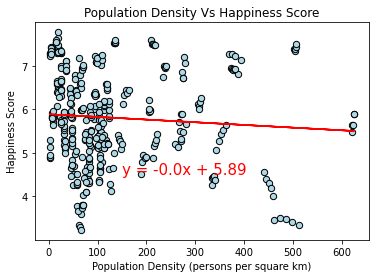

In [27]:
slope, intercept, rvalue, pvalue, stderr = linregress(pop_den, hap_score)
regress_values = pop_den * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(pop_den, hap_score, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.plot(pop_den,regress_values,"r-")
plt.annotate(line_eq,(150,4.5),fontsize=15,color="red")
plt.title("Population Density Vs Happiness Score")
plt.xlabel("Population Density (persons per square km)")
plt.ylabel("Happiness Score")
print(f" The R Value is:{rvalue}")
plt.show()

 The R Value is:-0.11723458156902687


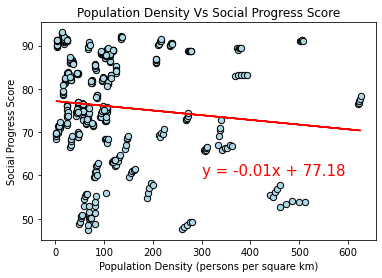

In [28]:
slope, intercept, rvalue, pvalue, stderr = linregress(pop_den, sp_index)
regress_values = pop_den * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(pop_den, sp_index, facecolors = 'lightblue', edgecolors = 'black', s = 40)
plt.plot(pop_den,regress_values,"r-")
plt.annotate(line_eq,(300,60),fontsize=15,color="red")
plt.title("Population Density Vs Social Progress Score")
plt.xlabel("Population Density (persons per square km)")
plt.ylabel("Social Progress Score")
print(f" The R Value is:{rvalue}")
plt.show()